# Chapter #4: Preprocessing and Pipelines

## 1. Preprocessing data

**scikit-learn requirements**
> - Recall that **scikit-learn requires numeric data, with no missing values**.
> - All the data that we have used so far has been in this format.
> - However, with **real-world data**, this will rarely be the case, and instead **we need to preprocess our data before we can build models**.

**Dealing with categorical features**
> - Say we have a dataset containing **categorical features**, such as color.
> - As these are not numeric, **scikit-learn will not accept them** and we need to convert them into **numeric features**.
> - We achieve this by **splitting the feature into multiple binary features called dummy variables**, one for each category.
> - **`0`** means the observation was **not that category**, while **`1`** means **it was**.

**Dummy variables**
> - Say we are working with a music dataset that has a genre feature with 10 values such as Electronic, Hip-Hop, and Rock.
> - We create **binary features** for each genre.
> - As each song has one genre, **each row will have a `1` in one of the 10 columns** and `0` in the rest.
> - If a song is not any of the first nine genres, **then implicitly, it is a rock song**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img01.png">

**Dummy variables**
> - That means **we only need nine features, so we can delete the Rock column**.
> - If we do not do this, **we are duplicating information, which might be an issue for some models**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img02.png">

**Dealing with categorical features in Python**
> - To create **dummy variables** we can use:
>> - **scikit-learn's** `OneHotEncoder()`,
>> - **pandas'** `get_dummies()`.
> - We will use **`get_dummies()`**.

**Music dataset**
> - We will be working with a **music dataset** in this chapter, for both **classification** and **regression** problems.
> - Initially, we will build a **regression model** using all features in the dataset to **predict song `popularity`**.
> - There is one categorical feature, **`genre`**, with **ten possible values**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img03.png">

**EDA w/ categorical feature**
> - This box plot shows how **`popularity` varies by `genre`**.
> - Let's encode this feature using **dummy variables**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img04.png">

**Encoding dummy variables**
> - We **import** pandas, **read** in the DataFrame, and **call** `pd.get_dummies()`, **passing** the categorical column.
> - As we only need to keep 9 out of our 10 binary features, we can **set** the `drop_first` argument to `True`.
> - Printing the first five rows, we see **pandas creates 9 new binary features**.
> - The first song is Jazz, and the second is Rap, indicated by a `1` in the respective columns.
> - To bring these binary features back into our original DataFrame we can **use** `pd.concat()`, **passing** a list containing the `music_df` DataFrame and our `music_dummies` DataFrame, and setting `axis` equal to `1`.
> - Lastly, we can **remove** the original `genre` column using `.drop()`, **passing(()) the column, and setting `axis` equal to `1`.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img05.png">

**Encoding dummy variables**
> - If the DataFrame only has one categorical feature, we can **pass** the entire DataFrame, thus skipping the step of combining variables.
> - If we **don't specify a column**, the new DataFrame's binary columns will have the original feature name **prefixed**, so they will start with genre-underscore - as shown here.
> - Notice the original genre column is **automatically dropped**.
> - Once we have dummy variables, we can **fit** models as before.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img07.png">

**Linear regression with dummy variables**
> - Using the `music_dummies` DataFrame, the process for creating **training** and **test sets** remains unchanged.
> - To perform **cross-validation** we then **create** a `KFold()` object, **instantiate** a linear regression model, and **call** `cross_val_score()`.
> - We **set** scoring equal to `neg_mean_squared_error`, which **returns the negative MSE**.
> - This is because scikit-learn's cross-validation metrics presume a **higher score is better**, so **MSE** is changed to **negative MSE** to counteract this.
> - We can **calculate** the training RMSE by **taking the square root and converting to positive**, achieved by **calling** `numpy.square-root()` and **passing** our scores with a **minus sign** in front.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_01_preprocessing_data_img08.png">

### 1.1. Creating dummy variables

Being able to **include categorical features in the model building process** can enhance performance as they may add information that contributes to prediction accuracy.

The `music_df` dataset has been preloaded for you, and its shape is printed. Also, `pandas` has been imported as `pd`.

Now you will create a new DataFrame containing the original columns of `music_df` plus dummy variables from the `"genre"` column.

- Set up the workspace.

In [1]:
import pandas as pd
music_df = pd.read_csv("./datasets/ch04_01_01_creating_dummy_variables.csv").drop(columns="Unnamed: 0")
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,Rap
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,Electronic
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,Rock
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,Rap


- Use a relevant function, passing the entire `music_df` DataFrame, to create `music_dummies`, dropping the first binary column.

In [2]:
music_dummies = pd.get_dummies(music_df, drop_first=True).rename(columns=lambda x: x.lower())
music_dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_anime,genre_blues,genre_classical,genre_country,genre_electronic,genre_hip-hop,genre_jazz,genre_rap,genre_rock
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,False,False,False,False,False,False,True,False,False
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,False,False,False,False,False,False,False,True,False
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,False,False,False,False,True,False,False,False,False
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,False,False,False,False,False,False,False,False,True
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,False,False,False,False,False,False,False,True,False


- Print the shape of `music_dummies`.

In [3]:
music_dummies.shape

(1000, 20)

### 1.2. Regression with categorical features

Now you have created `music_dummies`, containing binary features for each song's genre, it's time to **build a ridge regression model to predict song popularity**.

`music_dummies` has been preloaded for you, along with `Ridge`, `cross_val_score`, `numpy` as `np`, and a `KFold()` object stored as `kf`.

The model will be evaluated by calculating the average RMSE, but first, you will need to convert the scores for each fold to positive values and take their square root. This metric shows the average error of our model's predictions, so it can be compared against the standard deviation of the target value —`"popularity"`.

- Set up the workspace.

In [4]:
music_dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_anime,genre_blues,genre_classical,genre_country,genre_electronic,genre_hip-hop,genre_jazz,genre_rap,genre_rock
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,False,False,False,False,False,False,True,False,False
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,False,False,False,False,False,False,False,True,False
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,False,False,False,False,True,False,False,False,False
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,False,False,False,False,False,False,False,False,True
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,False,False,False,False,False,False,False,True,False


In [5]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

- Create `X`, containing all features in `music_dummies`, and `y`, consisting of the `"popularity"` column, respectively.

In [7]:
X = music_dummies.drop(columns="popularity").values
y = music_df["popularity"].values

- Instantiate a `ridge` regression model, setting `alpha` equal to `0.2`.

In [8]:
ridge = Ridge(alpha=0.2)

- Perform cross-validation on `X` and `y` using the `ridge` model, setting `cv` equal to `kf`, and using negative mean squared error as the scoring metric.

In [9]:
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

- Print the RMSE values by converting negative `scores` to positive and taking the square root.

In [10]:
rmse = np.sqrt(-scores)

In [11]:
print(f"Average RMSE: {np.mean(rmse):.2f}")
print(f"Standard deviation of the target array: {np.std(y):.2f}")

Average RMSE: 8.24
Standard deviation of the target array: 14.02


## 2. Handling missing data

**Missing data**
> - When there is **no value** for a feature in a particular row, we call it **missing** data.
> - This can happen because **there was no observation or the data might be corrupt**.
> - Whatever the reason, **we need to deal with it**.

**Music dataset**
> - Previously we worked with a **modified music dataset**.
> - Now let's inspect the **original version**, which contains one thousand rows.
> - We do this by **chaining `pandas`' `.isna()` with `.sum()` and `.sort_values()` methods**.
> - Each feature is missing **between `8` and `200`** values!

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img01.png">

**Dropping missing data**
> - A common approach is to **remove missing observations accounting for less than 5% of all data**.
> - To do this, we **use `pandas`' `.dropna()` method**, passing a list of **columns with less than 5% missing values** to the subset argument.
> - If there are missing values in our subset column, **the entire row is removed**.
> - **Rechecking** the DataFrame, we see **fewer missing values**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img02.png">

**Imputing values**
> - Another option is to **impute missing data**.
> - This means **making an educated guess as to what the missing values could be**:
>> - We can impute the **mean** of all non-missing entries for a given feature,
>> - We can also use other values like the **median**,
>> - For **categorical** values we commonly impute the **most frequent value**.
> - **Note we must split our data before imputing to avoid leaking test set information to our model, a concept known as data leakage.**

**Imputation with scikit-learn**
> - Here is a **workflow** for imputation to predict song popularity:
>> - We **import** `SimpleImputer` from `sklearn.impute`,
>> - As we will use **different imputation methods** for **categorical** and **numeric** features, we first **split** them, **storing** as `X_cat` and `X_num` respectively, along with our target array as `y`,
>> - We **create** categorical training and test sets,
>> - We **repeat** this for the numeric features,
>> - By **using the same value for the `random_state` argument**, the target arrays' values remain **unchanged**,
>> - To impute missing categorical values we **instantiate** a `SimpleImputer`, **setting** strategy as most frequent,
>> - By default, `SimpleImputer` expects `numpy.nan` to represent **missing values**,
>> - Now we **call** `.fit_transform()` to impute the training categorical features' missing values!
>> - **For the test categorical features, we call `.transform()`.**

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img03.png">

**Imputation with scikit-learn**
> - For our **numeric** data, we **instantiate** another imputer.
> - By default, it fills values with the **mean**.
> - **We fit and transform the training features, and transform the test features.**
> - We then **combine** our training data using `numpy.append()`, **passing** our two arrays, and set `axis` equal to `1`.
> - We **repeat** this for our test data.
> - Due to their ability to **transform** our data, imputers are known as **transformers**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img04.png">

**Imputing within a pipeline**
> - We can also impute using a **pipeline**, which is an **object used to run a series of transformations and build a model in a single workflow**.
> - To do this, we **import** `Pipeline` from `sklearn.pipeline`.
> - Here we perform **binary classification** to predict whether a song is rock or another genre.
> - We **drop** missing values accounting for less than 5% of our data.
> - We **convert** values in the genre column, which will be the target, to a `1` if Rock, else `0`, using `numpy.where()`.
> - We then create `X` and `y`.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img05.png">

**Imputing within a pipeline**
> - To build a pipeline we **construct** a list of steps containing **tuples with the step names specified as strings, and instantiate the transformer or model**. 
> - We **pass** this list when **instantiating** a Pipeline.
> - We then **split** our data, and **fit** the pipeline to the training data, as with any other model.
> - Finally, we **compute** accuracy.
> - **Note that, in a pipeline, each step but the last must be a transformer.**

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_02_handling_missing_data_img06.png">

### 2.1. Dropping missing data

Over the next three exercises, you are going to **tidy the `music_df` dataset**. You will **create a pipeline to impute missing values** and build a KNN classifier model, then use it to predict whether a song is of the `"Rock"` genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the `"genre"` column into a binary feature.

- Set up the workspace.

In [12]:
import pandas as pd
music_df = pd.read_csv("./datasets/ch04_02_01_dropping_missing_data.csv").drop(columns="Unnamed: 0")
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,64.0,0.69400,0.610,217400.0,0.590,0.000002,0.1500,-7.325,0.0362,137.838000,0.352,NaN
1,31.0,0.73900,0.565,260467.0,0.393,0.000845,0.1430,-9.309,0.0244,75.537000,0.229,Anime
2,57.0,0.00879,0.433,262867.0,0.815,0.000000,0.1380,-3.658,NaN,125.358000,0.461,Rock
3,63.0,0.01050,0.359,563893.0,0.762,0.281000,0.3680,-8.323,0.0320,89.259000,0.167,Rock
4,NaN,0.30100,0.511,NaN,0.699,NaN,0.0884,NaN,0.0370,120.406497,0.496,Anime


- Print the number of missing values for each column in the `music_df` dataset, sorted in ascending order.

In [13]:
music_df.isna().sum().sort_values()

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64

- Remove values for all columns with `50` or fewer missing values.

In [14]:
cols_to_dopna = ['genre', 'popularity', 'loudness', 'liveness', 'tempo']
music_df.dropna(subset=cols_to_dopna, inplace=True)

- Convert `music_df["genre"]` to values of `1` if the row contains `"Rock"`, otherwise change the value to `0`.

In [15]:
import numpy as np
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

In [16]:
print(music_df.isna().sum().sort_values())
print("\nShape of the music_df: {}".format(music_df.shape))

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64

Shape of the music_df: (892, 12)


### 2.2. Pipeline for song genre prediction: I

Now it's time to** build a pipeline**. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified `music_df` dataset that you created in the previous exercise has been preloaded for you, along with `KNeighborsClassifier` and `train_test_split`.

- Set up the workspace.

In [17]:
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
1,31.0,0.73900,0.565,260467.0,0.393,0.000845,0.143,-9.309,0.0244,75.537,0.2290,0
2,57.0,0.00879,0.433,262867.0,0.815,0.000000,0.138,-3.658,NaN,125.358,0.4610,1
3,63.0,0.01050,0.359,563893.0,0.762,0.281000,0.368,-8.323,0.0320,89.259,0.1670,1
5,65.0,NaN,0.491,-1.0,NaN,0.000003,0.626,-6.564,0.0281,112.704,0.4070,1
6,44.0,0.71000,0.627,NaN,0.496,NaN,0.343,-11.866,0.0396,95.000,0.0801,0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

- Import `SimpleImputer` and `Pipeline`.

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

- Instantiate an `imputer`.

In [20]:
imputer = SimpleImputer()

- Instantiate a KNN classifier with `3` neighbors.

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

- Create `steps`, a list of tuples containing the `imputer` variable you created, called `"imputer"`, followed by the `knn` model you created, called `"knn"`.

In [22]:
steps = [("imputer", imputer),
         ("knn", knn)]

### 2.3. Pipeline for song genre prediction: II

Having **set up the steps of the pipeline** in the previous exercise, you will now **use it on the `music_df` dataset to classify the genre of songs**. What makes pipelines so incredibly useful is the simple interface that they provide.

`X_train`, `X_test`, `y_train`, and `y_test` have been preloaded for you, and `confusion_matrix` has been imported from `sklearn.metrics`.

- Set up the workspace.

In [23]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_02_03_pipeline_for_song_genre_prediction_02_pickled01.pkl")

In [24]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [25]:
from sklearn.metrics import confusion_matrix

- Create a `pipeline` using the `steps` you previously defined.

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

- Fit the `pipeline` to the training data.

In [27]:
pipeline.fit(X_train, y_train);

- Make predictions on the test set.

In [28]:
y_pred = pipeline.predict(X_test)

- Calculate and print the confusion matrix.

In [29]:
print(confusion_matrix(y_test, y_pred))

[[79  9]
 [ 4 82]]


## 3. Centering and scaling

**Centering and scaling**
> - Data **imputation is one of several important preprocessing steps** for machine learning.
> - Now let's cover another: **centering and scaling our data**.

**Why scale our data?**
> - Let's **use** `music_df.describe()` to **check out the ranges** of some of our feature variables in the music dataset.
> - We see that the **ranges vary widely**: `duration_ms` ranges from `0` to `1.62` million, `speechiness` contains only decimal places, and `loudness` only has negative values!

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img01.png">

**Why scale our data?**
> - Many machine learning models **use some form of distance** to inform them, so **if we have features on far larger scales, they can disproportionately influence our model**.
> - For example, **KNN uses distance explicitly** when making predictions.
> - For this reason, we actually want features to be **on a similar scale**.
> - To achieve this, we can **normalize** or **standardize** our data, often referred to as **scaling** and **centering**.

**How to scale our data**
> - There are **several ways** to scale our data:
>> - Given any column, we can **subtract the mean and divide by the variance** so that **all features are centered around zero and have a variance of one**, this is called **standardization**,
>> - We can also **subtract the minimum and divide by the range** of the data so the **normalized dataset has minimum zero and maximum one**,
>> - Or, we can **center our data so that it ranges from -1 to 1 instead**.
> - In this video, we will perform **standardization**, but scikit-learn has functions available for other types of scaling.

**Scaling in scikit-learn**
> - To scale our features, we **import** `StandardScaler` from `sklearn.preprocessing`.
> - We **create** our feature and target arrays.
> - Before scaling, we **split** our data to avoid data leakage.
> - We then **instantiate** a `StandardScaler()` object, and **call** its `.fit_transform method()`, **passing** our training features.
> - Next, we **use** `scaler.transform()` on the test features.
> - Looking at the **mean** and **standard deviation** of the columns of both the original and scaled data verifies the **change has taken place**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img02.png">

**Scaling in a pipeline**
> - We can also **put a scaler in a pipeline!**
> - Here we **build** a pipeline object to scale our data and use a KNN model with `6` neighbors.
> - We then **split** our data, **fit** the pipeline to our training set, and **predict** on our test set.
> - **Computing** the accuracy yields a result of `0.81`.
> - Let's compare this to using **unscaled data**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img03.png">

**Comparing performance using unscaled data**
> - Here we **fit** a KNN model to our unscaled training data and **print** the accuracy.
> - It is only `0.53`, so **just by scaling our data we improved accuracy by over 50%!**

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img04.png">

**CV and scaling in a pipeline**
> - Let's also look at **how we can use cross-validation with a pipeline**:
>> - We first **build** our pipeline,
>> - We then **specify** our hyperparameter space by creating a dictionary: **the keys** are the pipeline step name followed by a double underscore, followed by the hyperparameter name**,
>> - The **corresponding value** is a list or an array of the values to try for that particular hyperparameter,
>> - In this case, we are **tuning** `n_neighbors` in the KNN model,
>> - Next we **split** our data into training and test sets,
>> - We then **perform** a grid search over our parameters by **instantiating** the `GridSearchCV()` object, **passing** our pipeline and setting the `param_grid` argument equal to `parameters`.
>> - We then **fit** it to our training data,
>> - Lastly, we **make predictions** using our test set.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img05.png">

**Checking model parameters**
> - **Printing** `GridSearchCV`'s `best_score_` attribute, we see the **score is very slightly better than our previous model's performance**.
> - **Printing** the best parameters, the optimal model has 12 neighbors.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_03_centering_and scaling_img06.png">

### 3.1. Centering and scaling for regression

Now you have seen the benefits of scaling your data, you will **use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness**.

`X_train`, `X_test`, `y_train`, and `y_test` have been created from the `music_df` dataset, where the target is `"loudness"` and the features are all other columns in the dataset. `Lasso` and `Pipeline` have also been imported for you.

Note that `"genre"` has been converted to a binary feature where `1` indicates a rock song, and `0` represents other genres.

- Set up the workspace.

In [30]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_03_01_centering_and_scaling_for_regression_pickled0.pkl")

In [31]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [32]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

- Import `StandardScaler`.

In [33]:
from sklearn.preprocessing import StandardScaler

- Create the `steps` for the `pipeline` object, a `StandardScaler()` object called `"scaler"`, and a `lasso` model called `"lasso"` with `alpha` set to` 0.5`.

In [34]:
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

- Instantiate a `pipeline` with `steps` to scale and build a `lasso` regression model.

In [35]:
pipeline = Pipeline(steps)

In [36]:
pipeline.fit(X_train, y_train);

- Calculate the R-squared value on the test data.

In [37]:
pipeline.score(X_test, y_test)

0.6193523316282489

### 3.2. Centering and scaling for classification

Now you will **bring together scaling and model building into a pipeline for cross-validation**.

Your task is to build a `pipeline` to scale features in the `music_df` dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter `C`. The target variable here is `"genre"`, which contains binary values for rock as `1` and any other genre as `0`.

`StandardScaler`, `LogisticRegression`, and `GridSearchCV` have all been imported for you.

- Set up the workspace.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [39]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_03_02_centering_and_scaling_for_classification_pickled01.pkl")

In [40]:
X, y = pickled_objs["X"], pickled_objs["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

- Build the `steps` for the `pipeline`: a `StandardScaler()` object named `"scaler"`, and a logistic regression model named `"logreg"`.

In [41]:
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]

In [42]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

- Create the parameters, searching `20` equally spaced `float` values ranging from` 0.001` to `1.0` for the logistic regression model's `C `hyperparameter within the `pipeline`.

In [43]:
import numpy as np
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

- Instantiate the grid search object.

In [44]:
cv = GridSearchCV(pipeline, param_grid=parameters)

- Fit the grid search object to the training data.

In [45]:
cv.fit(X_train, y_train);

In [46]:
print(cv.best_score_)
print(cv.best_params_)

0.8425
{'logreg__C': 0.1061578947368421}


## 4. Evaluating multiple models

**Evaluating multiple models**
> - We've covered all parts of the **supervised learning workflow**.
> - But how do we decide **which model to use in the first place?**

**Different models for different problems**
> - This is a **complex question**, and the **answer depends on our situation**.
> - However, there are **some principles** that can guide us when making this decision:
>> - The **size of our dataset** plays a role:
>>> - **Fewer features** means a **simpler model**, and can reduce training time,
>>> - Also, **some models**, such as Artificial Neural Networks, **require a lot of data to perform well**.
>> - We may need an **interpretable** model, so we can **explain to stakeholders how predictions were made**:
>>> - An example is **linear regression**, where we can **calculate and interpret the model coefficients**.
>> - Alternatively, **flexibility** might be important to **get the most accurate predictions**:
>>> - Generally, **flexible models make fewer assumptions about the data**; for example, a **KNN model does not assume a linear relationship between the features and the target**.

**It's all in the metrics**
> - Notice that **scikit-learn allows the same methods to be used for most models**, this makes it **easy to compare them!**
>> - **Regression models** can be evaluated using the **root mean squared error**, or the **R-squared** value,
>> - Likewise, **classification models** can all be analyzed using **accuracy**, **confusion matrix** and its **associated metrics**, or the **ROC AUC**.
> - Therefore, one approach is to **select** several **model**s and a **metric(s)**, then **evaluate** their performance without any form of **hyperparameter tuning**.

**A note on scaling**
> - Recall that the performance of some models, such as **KNN**, **linear regression**, and **logistic regression**, is **affected by scaling our data**.
> - Therefore, it is generally best to **scale our data before evaluating models** out of the box.

**Evaluating classification models**
> - We will evaluate **three models for binary classification** of song genre: **KNN**, *logistic regression**, and a new model called a **decision tree classifier**.
> - We **import** our required modules, including `DecisionTreeClassifier` from `sklearn.tree`, the workings of decision trees are outside the scope of this course, but the steps for building this model are the same as for other models in scikit-learn.
> - As usual, we **create** our feature and target arrays, then **split** our data.
> - We then **scale** our features using the scaler's **`.fit_transform()` method on the training set, and the `.transform()` method on the test set**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_04_evaluating_multiple_models_img01.png">

**Evaluating classification models**
> - We **create** a dictionary with our model names as strings for the keys, and **instantiate** models as the dictionary's values.
> - We also **create** an empty list to store the results.
> - Now we **loop through** the models in our models dictionary, using its `.values()` method.
> - Inside the loop, we **instantiate** a `KFold()` object.
> - Next we **perform** cross-validation, using the model being iterated, along with our scaled training features, and target training array.
> - We **set** `cv` equal to our `kfold` variable.
> - By default, the scoring here will be **accuracy**.
> - We then **append** the cross-validation results to our results list.
> - Lastly, outside of the loop, we **create** a boxplot of our results, and **set** the labels argument equal to a call of model's `.keys()` to retrieve each model's name.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_04_evaluating_multiple_models_img02.png">

**Visualizing results**
> - The output shows us the **range of cross-validation accuracy scores**.
> - We can also see **each model's median cross-validation score**, represented by the **orange line** in each box.
> - We can see **logistic regression has the best median score**.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_04_evaluating_multiple_models_img03.png">

**Test set performance**
> - To evaluate on the test set we **loop through** the names and values of the dictionary using the `.items()` method.
> - Inside the loop we **fit** the model, **calculate** accuracy, and print it.
> - **Logistic regression performs best** for this problem if we are using **accuracy** as the metric.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch04_04_evaluating_multiple_models_img04.png">

### 4.1. Visualizing regression model performance

Now you have seen how to **evaluate multiple models out of the box**, you will build three regression models to predict a song's `"energy"` levels.

The `music_df` dataset has had dummy variables for `"genre"` added. Also, feature and target arrays have been created, and these have been split into `X_train`, `X_test`, `y_train`, and `y_test`.

The following have been imported for you: `LinearRegression`, `Ridge`, `Lasso`, `cross_val_score`, and `KFold`.

- Set up the workspace.

In [47]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_04_01_visualizing_regression_model_performance_pickled01.pkl")

In [48]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [49]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, KFold

- Write a `for` loop using `model` as the iterator, and `model.values()` as the iterable.
- Perform cross-validation on the training features and the training target array using the model, setting `cv` equal to the `KFold` object.
- Append the model's cross-validation scores to the `results` list.

In [50]:
models = {"Linear Regression": LinearRegression(),
          "Ridge": Ridge(alpha=0.1),
          "Lasso": Lasso(alpha=0.1)}

In [51]:
kf = KFold(n_splits=6, random_state=42, shuffle=True)

In [52]:
results = []
for model in models.values():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_scores)

- Create a box plot displaying the results, with the x-axis labels as the names of the models.

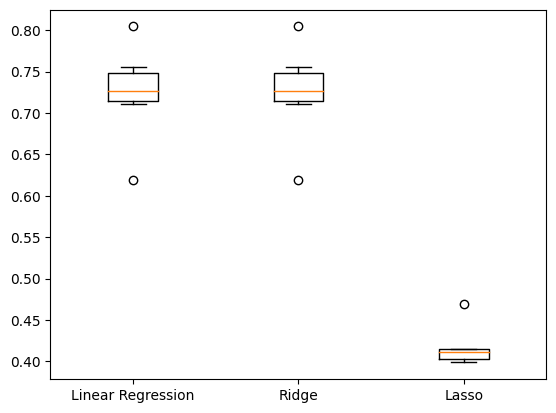

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.boxplot(x=results, labels=models.keys());

### 4.2. Predicting on the test set

In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can **check predictive performance on the test set to see if either one can outperform the other**.

You will use root mean squared error (RMSE) as the metric. The dictionary `models`, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`.

- Set up the workspace.

In [54]:
from sklearn.linear_model import LinearRegression, Ridge
models = {'Linear Regression': LinearRegression(), 'Ridge': Ridge()}

In [55]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_04_02_predicting_on_the_test_set_pickled01.pkl")

<Figure size 640x480 with 0 Axes>

In [56]:
X_train_scaled, X_test_scaled = pickled_objs["X_train_scaled"], pickled_objs["X_test_scaled"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

- Import `mean_squared_error`.

In [57]:
from sklearn.metrics import mean_squared_error

- Fit the model to the scaled training features and the training labels.
- Make predictions using the scaled test features.
- Calculate RMSE by passing the test set labels and the predicted labels.

In [58]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"{name} test set RMSE: {test_rmse:.3f}")

Linear Regression test set RMSE: 0.120
Ridge test set RMSE: 0.120


### 4.3. Visualizing classification model performance

In this exercise, you will be **solving a classification problem** where the `"popularity"` column in the `music_df` dataset has been converted to binary values, with `1` representing popularity more than or equal to the median for the `"popularity"` column, and `0` indicating popularity below the median.

Your task is to **build and visualize the results of three different models to classify whether a song is popular or not**.

The data has been split, scaled, and preloaded for you as `X_train_scaled`, `X_test_scaled`, `y_train`, and `y_test`. Additionally, `KNeighborsClassifier`, `DecisionTreeClassifier`, and `LogisticRegression` have been imported.

- Set up the workspace

In [59]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_04_03_visualizing_classification_model_performance_pickled01.pkl")

In [60]:
X_train_scaled, X_test_scaled = pickled_objs["X_train_scaled"], pickled_objs["X_test_scaled"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

- Create a dictionary of `"Logistic Regression"`, `"KNN"`, and `"Decision Tree Classifier"`, setting the dictionary's values to a call of each model.

In [62]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier()}

- Loop through the values in `models`.
- Instantiate a `KFold()` object to perform `6` splits, setting `shuffle` to `True` and `random_state` to `12`.
- Perform cross-validation using the model, the scaled training features, the target training set, and setting `cv` equal to `kf`.

In [63]:
results = []
kf = KFold(n_splits=6, shuffle=True, random_state=12)
for model in models.values():
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

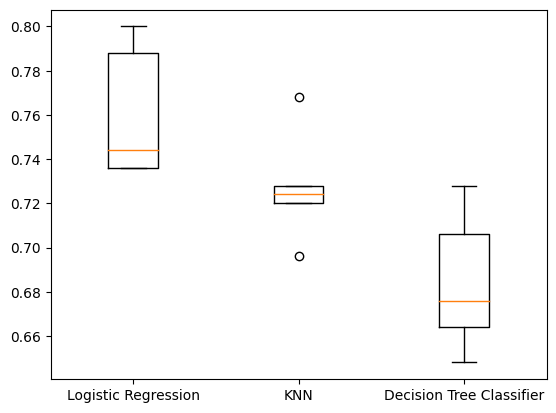

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.boxplot(x=results, labels=models.keys());

### 4.4. Pipeline for predicting song popularity

For the final exercise, you will **build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model**. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

- Set up the workspace.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [66]:
%run "./helpers/pickle_objs.py"
pickled_objs = load("./assets/ch04_04_04_pipeline_for_predicting_song_popularity_pickled01.pkl")

<Figure size 640x480 with 0 Axes>

In [67]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

- Create the `steps` for the `pipeline` by calling a simple imputer, a standard scaler, and a logistic regression model.

In [68]:
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

- Create a `pipeline` object, and pass the ``steps`` variable.

In [69]:
pipeline = Pipeline(steps)

- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.

In [70]:
import numpy as np
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
          "logreg__C": np.linspace(0.001, 1.0, 10)}

In [71]:
tuning = GridSearchCV(pipeline, param_grid=params)

In [72]:
tuning.fit(X_train, y_train);

In [73]:
y_pred = tuning.predict(X_test)

- Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [74]:
best_params = tuning.best_params_
accuracy = tuning.score(X_test, y_test)

In [75]:
print(f"Tuned Logistic Regression Parameters: {best_params}, Accuracy: {accuracy:.3f}")

Tuned Logistic Regression Parameters: {'logreg__C': 0.112, 'logreg__solver': 'newton-cg'}, Accuracy: 0.820


## 5. Congratulations!

**What you've covered**
> - To **recap** you have learned:
>> - The fundamentals of using **supervised learning techniques** to build predictive models for both **regressio**n and **classification** problems,
>> - You have learned the concepts of **underfitting** and **overfitting**, how to **split** data, and perform **cross-validation**,
>> - You also learned about **data preprocessing** techniques, **selected which model to build**, performed **hyperparameter tuning**, assessed **model performance**, and used **pipelines**!

**Where to go from here?**
> - We covered several models, **but there are plenty of others**, so to learn more we recommend checking out **some of our courses**.
> - We also have **courses that dive deeper into topics we introduced**, such as:
>> - Machine Learning with Tree-Based Models in Python,
>> - Preprocessing for Machine Learning in Python,
>> - Model Validation in Python.
> - There are other **courses on topics we did not cover**, such as:
>> - Feature Engineering for Machine Learning in Python,
>> - Unsupervised Learning in Python.
feature engineering, and unsupervised learning.
> - Additionally, we have many **machine learning projects** where you can apply the skills you've learned here!